In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import QuantileTransformer


# READ DF + NORMALIZE

In [2]:
df = pd.read_csv("marketing_encoded_new.csv")
df

,Unnamed: 0,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,total_products,frequent_purchases,total_child,age
0,0,2,4,58138.0,58,7,0,0,0,0,0,0,1617,25,0,66
1,1,2,4,46344.0,38,5,0,0,0,0,0,0,27,6,2,69
2,2,2,5,71613.0,26,4,0,0,0,0,0,0,776,21,0,58
3,3,2,5,26646.0,26,6,0,0,0,0,0,0,53,8,1,39
4,4,4,3,58293.0,94,5,0,0,0,0,0,0,422,19,1,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2235,2,3,61223.0,46,5,0,0,0,0,0,0,1341,18,1,56
2212,2236,4,5,64014.0,56,7,0,0,0,1,0,0,444,22,3,77
2213,2237,2,2,56981.0,91,6,0,1,0,0,0,0,1241,19,0,42
2214,2238,3,5,69245.0,8,3,0,0,0,0,0,0,843,23,1,67


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Education           2216 non-null   int64  
 1   Marital_Status      2216 non-null   int64  
 2   Income              2216 non-null   float64
 3   Recency             2216 non-null   int64  
 4   NumWebVisitsMonth   2216 non-null   int64  
 5   AcceptedCmp3        2216 non-null   int64  
 6   AcceptedCmp4        2216 non-null   int64  
 7   AcceptedCmp5        2216 non-null   int64  
 8   AcceptedCmp1        2216 non-null   int64  
 9   AcceptedCmp2        2216 non-null   int64  
 10  Complain            2216 non-null   int64  
 11  total_products      2216 non-null   int64  
 12  frequent_purchases  2216 non-null   int64  
 13  total_child         2216 non-null   int64  
 14  age                 2216 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 259.8 KB


In [5]:
quantile_trans = QuantileTransformer(n_quantiles=df.shape[0], output_distribution='normal')
df_scaled = pd.DataFrame(quantile_trans.fit_transform(df), columns=df.columns)
df_scaled

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,total_products,frequent_purchases,total_child,age
0,-0.341494,0.253931,0.241678,0.245759,0.573746,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.401135,1.240208,-5.199338,0.848089
1,-0.341494,0.253931,-0.183793,-0.274439,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.477643,-1.022496,1.195084,1.120966
2,-0.341494,0.977712,0.831985,-0.615614,-0.514687,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.371038,0.674845,-5.199338,0.341494
3,-0.341494,0.977712,-1.141349,-0.615614,0.135648,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.891874,-0.616983,0.095203,-1.241430
4,5.199338,-0.523102,0.245176,1.637241,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.042450,0.423702,0.095203,-0.983202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.341494,-0.523102,0.348100,-0.098046,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.040800,0.315218,0.095203,0.213804
2212,5.199338,0.977712,0.471869,0.188398,0.573746,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,0.074759,0.814515,5.199338,2.166824
2213,-0.341494,-1.603594,0.195315,1.381768,0.135648,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.931310,0.423702,-5.199338,-0.983202
2214,0.526349,0.977712,0.707174,-1.351536,-0.811366,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.438605,0.965917,0.095203,0.928695


# K-MEANS-LTS

In [6]:
# Return K_MEANS dengan cluster_id dan distance to centroid
def cluster_maker(dataframe, n_cluster_lts):
    kmeans = KMeans(n_clusters=n_cluster_lts, init='k-means++', random_state=42).fit(dataframe)

    dataframe['distance_to_centroid'] = np.min(kmeans.transform(dataframe), axis=1)
    dataframe['cluster_id'] = kmeans.labels_

    return dataframe

In [7]:
# Memisahkan dataframe & mengurutkan berdasarkan distance
def separate_dataframe(dataframe, n_cluster_lts, sort_column='distance_to_centroid'):
    cluster_dfs = {}

    for i in range(n_cluster_lts):
        cluster_dfs[i] = [dataframe[dataframe['cluster_id'] == i]]
        cluster_dfs[i][0] = cluster_dfs[i][0].sort_values(sort_column, ascending=False)
        
    return cluster_dfs

In [8]:
def KMeans_LTS(df, n_cluster_lts, n_percent):
    clustered_df = cluster_maker(df, n_cluster_lts)
    cluster_dict = separate_dataframe(clustered_df, n_cluster_lts)
    inliers_dfs = []
    outliers_dfs = []

    for cluster_id, df_list in cluster_dict.items():
        # Mengurutkan DataFrame berdasarkan distance_to_centroid secara descending
        sorted_df = df_list[0].sort_values(by='distance_to_centroid', ascending=False)

        # Menghitung jumlah baris yang akan di-trim
        n_rows_to_trim = int(n_percent / 100 * len(sorted_df))

        # Memisahkan inliers dan outliers
        inliers_df = sorted_df.iloc[n_rows_to_trim:]
        outliers_df = sorted_df.iloc[:n_rows_to_trim]

        # Menambahkan cluster_id-out ke outliers
        outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'

        # Menyimpan DataFrame inliers dan outliers
        inliers_dfs.append(inliers_df)
        outliers_dfs.append(outliers_df)

    # Menggabungkan DataFrame inliers dari semua cluster sesuai dengan index awal
    inliers_result = pd.concat(inliers_dfs).drop(columns=['distance_to_centroid']).sort_index()

    # Menggabungkan DataFrame outliers dari semua cluster
    outliers_result = pd.concat(outliers_dfs).drop(columns=['distance_to_centroid']).sort_index()

    # Return hasil clustering inliers+outliers sesuai dengan index awal
    optimal_cluster = pd.concat([inliers_result, outliers_result], axis=0).sort_index()

    return inliers_result, optimal_cluster

# TEST K-MEANS LTS ALGORITHM with K = 2 and n_percentage = 10

C:\Users\Asus\AppData\Local\Temp\ipykernel_4128\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


<Figure size 800x800 with 0 Axes>

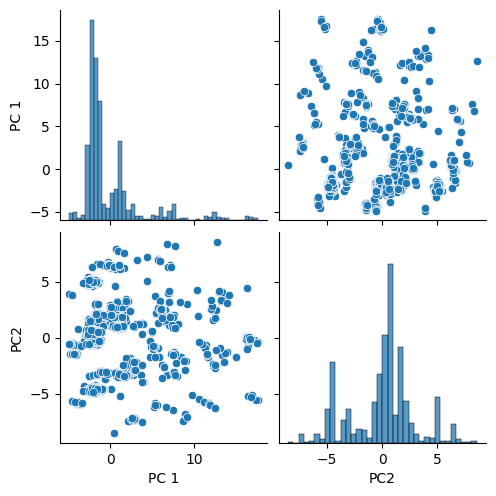

<Figure size 800x800 with 0 Axes>

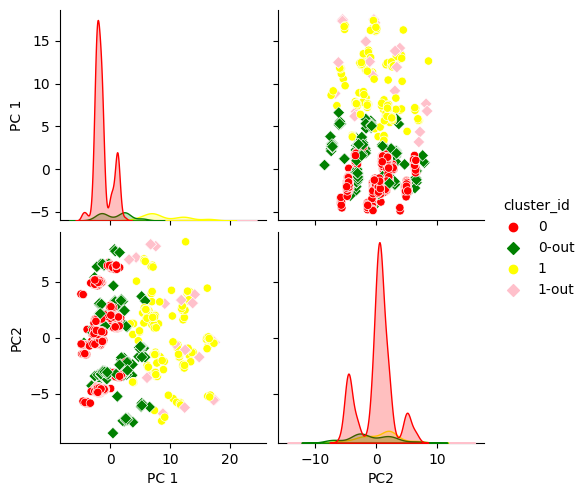

<Figure size 800x800 with 0 Axes>

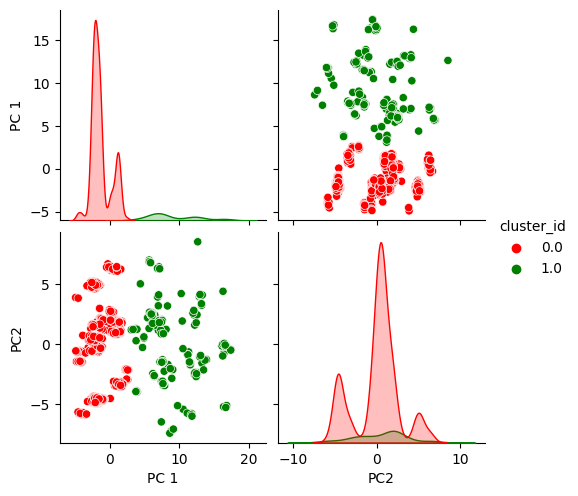

In [9]:
# TEST VISUALIZATION
from sklearn.decomposition import PCA
import seaborn as sns 

# PCA variable input
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC 1', 'PC2'])
plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca)

# GET inliers (LTS_result_filtered) and optimal cluster (LTS_result)
test_df = df_scaled.copy()
LTS_result_filtered, LTS_result = KMeans_LTS(test_df, 2, 10)

# PAIR PLOT with OUTLIERS
df_pca['cluster_id'] = LTS_result.loc[:, LTS_result.columns.isin(['cluster_id'])]

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster_id', markers=["o", "D"], palette=['red', 'green', 'yellow', 'pink'])

#PAIR PLOT without OUTLIERS
df_pca['cluster_id'] = LTS_result_filtered.loc[:, LTS_result_filtered.columns.isin(['cluster_id'])]

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster_id', palette=['red', 'green'])

In [10]:
display(LTS_result, LTS_result_filtered)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,total_products,frequent_purchases,total_child,age,cluster_id
0,-0.341494,0.253931,0.241678,0.245759,0.573746,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.401135,1.240208,-5.199338,0.848089,0
1,-0.341494,0.253931,-0.183793,-0.274439,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.477643,-1.022496,1.195084,1.120966,0
2,-0.341494,0.977712,0.831985,-0.615614,-0.514687,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.371038,0.674845,-5.199338,0.341494,0
3,-0.341494,0.977712,-1.141349,-0.615614,0.135648,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.891874,-0.616983,0.095203,-1.241430,0
4,5.199338,-0.523102,0.245176,1.637241,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.042450,0.423702,0.095203,-0.983202,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.341494,-0.523102,0.348100,-0.098046,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.040800,0.315218,0.095203,0.213804,0
2212,5.199338,0.977712,0.471869,0.188398,0.573746,-5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,0.074759,0.814515,5.199338,2.166824,0-out
2213,-0.341494,-1.603594,0.195315,1.381768,0.135648,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.931310,0.423702,-5.199338,-0.983202,0-out
2214,0.526349,0.977712,0.707174,-1.351536,-0.811366,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.438605,0.965917,0.095203,0.928695,0


,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,total_products,frequent_purchases,total_child,age,cluster_id
0,-0.341494,0.253931,0.241678,0.245759,0.573746,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.401135,1.240208,-5.199338,0.848089,0
1,-0.341494,0.253931,-0.183793,-0.274439,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.477643,-1.022496,1.195084,1.120966,0
2,-0.341494,0.977712,0.831985,-0.615614,-0.514687,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.371038,0.674845,-5.199338,0.341494,0
3,-0.341494,0.977712,-1.141349,-0.615614,0.135648,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.891874,-0.616983,0.095203,-1.241430,0
4,5.199338,-0.523102,0.245176,1.637241,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.042450,0.423702,0.095203,-0.983202,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,-0.341494,0.977712,5.199338,-0.723251,0.135648,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.760505,-0.292700,0.095203,-0.645992,0
2210,-0.341494,-0.523102,-0.721047,0.918294,0.573746,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.398121,-1.845180,0.095203,-0.348100,0
2211,-0.341494,-0.523102,0.348100,-0.098046,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.040800,0.315218,0.095203,0.213804,0
2214,0.526349,0.977712,0.707174,-1.351536,-0.811366,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.438605,0.965917,0.095203,0.928695,0


In [11]:
# FIND SILHOUETTE SCORE
from sklearn.metrics import silhouette_score

inliers_no_id = LTS_result_filtered.drop(['cluster_id'], axis=1)
score = silhouette_score(inliers_no_id, LTS_result_filtered['cluster_id'])
print(score)

0.5316890274940299


In [12]:
# Davies Bouldin Score

from sklearn.metrics import davies_bouldin_score

inliers_no_id = LTS_result_filtered.drop(['cluster_id'], axis=1)
score = davies_bouldin_score(inliers_no_id, LTS_result_filtered['cluster_id'])
print(score)

1.32067147096581


In [13]:
# FIND SILHOUETTE SCORE untuk HASIL CLUSTER dari INLIERS saja
inliers_cluster = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(inliers_no_id)
score = silhouette_score(inliers_no_id, inliers_cluster.labels_)
print(score)

0.5316890274940299


In [14]:
# Davies Bouldin Score INLIERS SAJA

inliers_cluster = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(inliers_no_id)
score = davies_bouldin_score(inliers_no_id, inliers_cluster.labels_)
print(score)

1.32067147096581


# K and PERCENTAGE OPTIMIZATIONS

In [15]:
def best_percentage(dataframe, n_cluster_lts):
    best_silhouette_score = 0
    best_percent = 0
    best_inliers = None
    best_cluster = None

    for percent in range(5, 35, 5):
        print("PERCENT:", percent)
        inliers, optimal_cluster = KMeans_LTS(dataframe, n_cluster_lts=n_cluster_lts, n_percent=percent)

        score = silhouette_score(inliers.iloc[:, :-1], inliers['cluster_id'])
        print("Score:", score)

        if score > best_silhouette_score:
            best_silhouette_score = score
            best_percent = percent
            best_inliers = inliers
            best_cluster = optimal_cluster
    
    print("====================================================")
    print("Best Silhouette Score:", best_silhouette_score)
    print("Best Percent:", best_percent)

    return best_inliers, best_cluster

test_df = df_scaled.copy()
best_inliers, best_cluster = best_percentage(test_df, 2)

PERCENT: 5


C:\Users\Asus\AppData\Local\Temp\ipykernel_4128\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


Score: 0.5096953385941277
PERCENT: 10


C:\Users\Asus\AppData\Local\Temp\ipykernel_4128\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


Score: 0.4447051067085781
PERCENT: 15


C:\Users\Asus\AppData\Local\Temp\ipykernel_4128\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


Score: 0.43860721419628373
PERCENT: 20


C:\Users\Asus\AppData\Local\Temp\ipykernel_4128\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


Score: 0.44500515401173213
PERCENT: 25


C:\Users\Asus\AppData\Local\Temp\ipykernel_4128\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


Score: 0.454630485050297
PERCENT: 30
Score: 0.4624448980100674
Best Silhouette Score: 0.5096953385941277
Best Percent: 5


C:\Users\Asus\AppData\Local\Temp\ipykernel_4128\951060904.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df.loc[:, outliers_df.columns.isin(['cluster_id'])] = str(cluster_id) + '-out'


In [16]:
best_inliers

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,total_products,frequent_purchases,total_child,age,cluster_id
0,-0.341494,0.253931,0.241678,0.245759,0.573746,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.401135,1.240208,-5.199338,0.848089,0
1,-0.341494,0.253931,-0.183793,-0.274439,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.477643,-1.022496,1.195084,1.120966,0
2,-0.341494,0.977712,0.831985,-0.615614,-0.514687,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.371038,0.674845,-5.199338,0.341494,0
3,-0.341494,0.977712,-1.141349,-0.615614,0.135648,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.891874,-0.616983,0.095203,-1.241430,0
4,5.199338,-0.523102,0.245176,1.637241,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.042450,0.423702,0.095203,-0.983202,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,-0.341494,0.977712,5.199338,-0.723251,0.135648,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.760505,-0.292700,0.095203,-0.645992,0
2210,-0.341494,-0.523102,-0.721047,0.918294,0.573746,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.398121,-1.845180,0.095203,-0.348100,0
2211,-0.341494,-0.523102,0.348100,-0.098046,-0.213804,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1.040800,0.315218,0.095203,0.213804,0
2214,0.526349,0.977712,0.707174,-1.351536,-0.811366,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.438605,0.965917,0.095203,0.928695,0


In [17]:
# Davies Bouldin Score INLIERS SAJA

score = davies_bouldin_score(best_inliers.drop('cluster_id', axis=1), best_inliers['cluster_id'])
print(score)

1.3622744033550978


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\a

<Figure size 800x800 with 0 Axes>

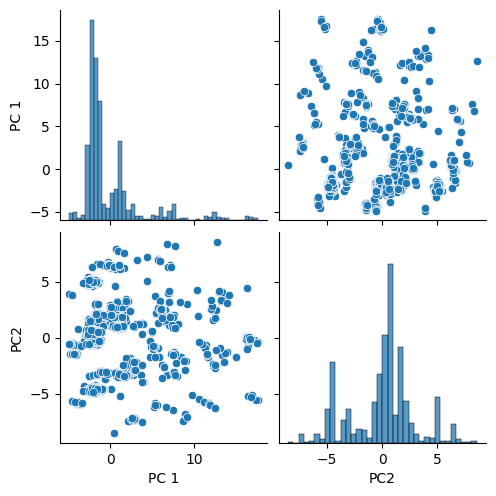

<Figure size 800x800 with 0 Axes>

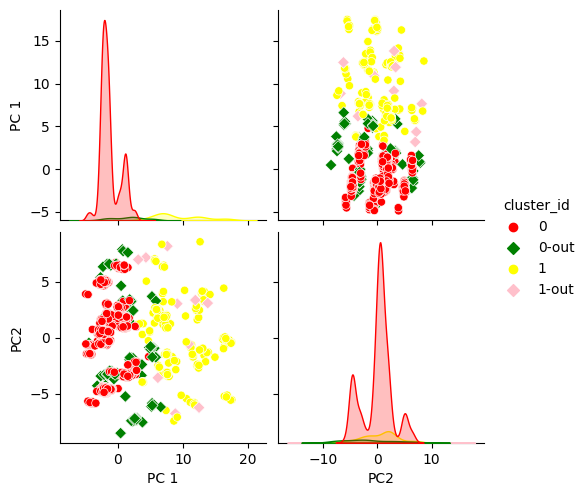

<Figure size 800x800 with 0 Axes>

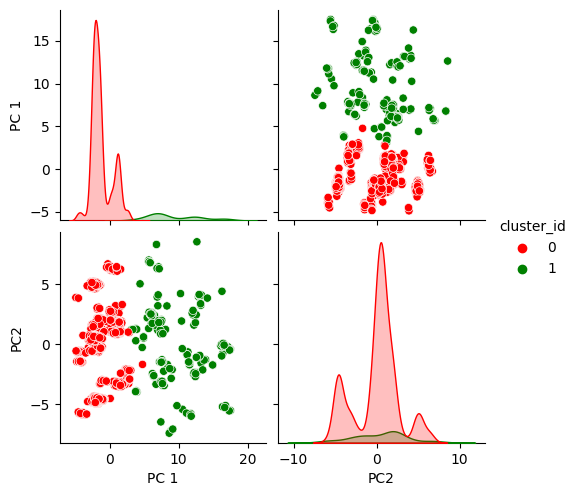

In [18]:
# OPTIMAL VISUALIZATION
from sklearn.decomposition import PCA
import seaborn as sns 

# PCA variable input
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC 1', 'PC2'])
plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca)

# PAIR PLOT OPTIMAL with OUTLIERS
df_pca['cluster_id'] = best_cluster.loc[:, best_cluster.columns.isin(['cluster_id'])]

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster_id', markers=["o", "D"], palette=['red', 'green', 'yellow', 'pink', 'brown', 'orange', 'blue'])

#PAIR PLOT OPTIMAL without OUTLIERS
df_pca['cluster_id'] = best_inliers.loc[:, best_inliers.columns.isin(['cluster_id'])]
df_pca.dropna(inplace=True)
df_pca['cluster_id'] = df_pca['cluster_id'].astype(int)

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster_id', palette=['red', 'green', 'yellow', 'pink', 'brown', 'orange', 'blue'])